# Import necessary depencencies

In [26]:
import pandas as pd
import numpy as np
import text_normalizer as tn
np.set_printoptions(precision=2, linewidth=80)

# Load and normalize data

In [10]:
dataset = pd.read_csv(r'movie_reviews.csv')

# take a peek at the data
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [39]:
# shape of dataset
dataset.shape

(50000, 2)

In [40]:
# checking for null values
dataset.isna().sum()

review       0
sentiment    0
dtype: int64

In [41]:
# info of our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [42]:
# Encoding Sentiment column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["sentiment"] = le.fit_transform(dataset["sentiment"])
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [11]:
reviews = np.array(dataset['review'])
sentiments = np.array(dataset['sentiment'])

# build train and test datasets
train_reviews = reviews[:35000]
train_sentiments = sentiments[:35000]
test_reviews = reviews[35000:]
test_sentiments = sentiments[35000:]

# normalize datasets
norm_train_reviews = tn.normalize_corpus(train_reviews)
norm_test_reviews = tn.normalize_corpus(test_reviews)

# Traditional Supervised Machine Learning Models

## Feature Engineering

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(norm_train_reviews)

# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_reviews)

In [13]:
# transform test reviews into features
cv_test_features = cv.transform(norm_test_reviews)
tv_test_features = tv.transform(norm_test_reviews)

In [14]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (35000, 2105699)  Test features shape: (15000, 2105699)
TFIDF model:> Train features shape: (35000, 2105699)  Test features shape: (15000, 2105699)


## Model Training, Prediction and Performance Evaluation

In [70]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', max_iter=100)

#### Logistic Regression using BOW features

In [90]:
# Logistic Regression model on BOW features
lr.fit(cv_train_features,train_sentiments)
# predict using model
predictions = lr.predict(cv_test_features) 

In [91]:
score = lr.score(cv_test_features,test_sentiments)
print("Accuracy score:",np.round(score,2)*100,"%")

Accuracy score: 91.0 %


Confusion matrix:


Text(0.5, 1.0, 'Accuracy Score: 91.0%')

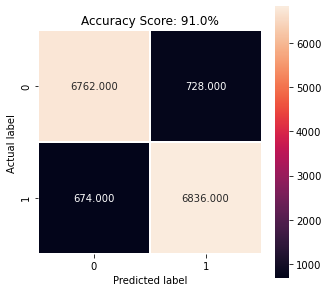

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(test_sentiments, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion matrix:")
all_sample_title = 'Accuracy Score: {0}%'.format(np.round(score,2)*100)
plt.title(all_sample_title, size = 12)

In [93]:
from sklearn.metrics import classification_report
print("Classification report\n")
print(classification_report(test_sentiments, predictions))

Classification report

              precision    recall  f1-score   support

    negative       0.91      0.90      0.91      7490
    positive       0.90      0.91      0.91      7510

    accuracy                           0.91     15000
   macro avg       0.91      0.91      0.91     15000
weighted avg       0.91      0.91      0.91     15000



In [94]:
from sklearn import metrics
print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(test_sentiments, predictions)))
print('Precision: {:2.2%} '.format(metrics.precision_score(test_sentiments, predictions, average='weighted')))
print('Recall:    {:2.2%} '.format(metrics.recall_score(test_sentiments, predictions, average='weighted')))
print('F1 Score:  {:2.2%} '.format(metrics.f1_score(test_sentiments, predictions, average='weighted')))                       

Accuracy:  90.65% 
Precision: 90.66% 
Recall:    90.65% 
F1 Score:  90.65% 


#### Logistic Regression using TFIDF features

In [95]:
# Logistic Regression model on BOW features
lr.fit(tv_train_features,train_sentiments)
# predict using model
predictions = lr.predict(tv_test_features) 

In [96]:
score = lr.score(tv_test_features,test_sentiments)
print("Accuracy score:",np.round(score,2)*100,"%")

Accuracy score: 89.0 %


Confusion matrix:


Text(0.5, 1.0, 'Accuracy Score: 89.0%')

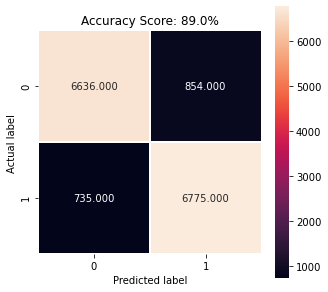

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(test_sentiments, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion matrix:")
all_sample_title = 'Accuracy Score: {0}%'.format(np.round(score,2)*100)
plt.title(all_sample_title, size = 12)

In [98]:
from sklearn.metrics import classification_report
print("Classification report\n")
print(classification_report(test_sentiments, predictions))

Classification report

              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      7490
    positive       0.89      0.90      0.90      7510

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



In [99]:
from sklearn import metrics
print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(test_sentiments, predictions)))
print('Precision: {:2.2%} '.format(metrics.precision_score(test_sentiments, predictions, average='weighted')))
print('Recall:    {:2.2%} '.format(metrics.recall_score(test_sentiments, predictions, average='weighted')))
print('F1 Score:  {:2.2%} '.format(metrics.f1_score(test_sentiments, predictions, average='weighted')))                       

Accuracy:  89.41% 
Precision: 89.42% 
Recall:    89.41% 
F1 Score:  89.41% 


#### SVM model using BOW features

In [100]:
# SVM model on BOW features
svm.fit(cv_train_features,train_sentiments)
# predict using model
predictions = svm.predict(cv_test_features) 

In [101]:
score = svm.score(cv_test_features,test_sentiments)
print("Accuracy score:",np.round(score,2)*100,"%")

Accuracy score: 90.0 %


Confusion matrix:


Text(0.5, 1.0, 'Accuracy Score: 90.0%')

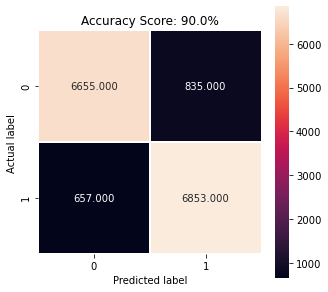

In [102]:
cm = metrics.confusion_matrix(test_sentiments, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion matrix:")
all_sample_title = 'Accuracy Score: {0}%'.format(np.round(score,2)*100)
plt.title(all_sample_title, size = 12)

In [103]:
from sklearn.metrics import classification_report
print("Classification report\n")
print(classification_report(test_sentiments, predictions))

Classification report

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      7490
    positive       0.89      0.91      0.90      7510

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



In [104]:
from sklearn import metrics
print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(test_sentiments, predictions)))
print('Precision: {:2.2%} '.format(metrics.precision_score(test_sentiments, predictions, average='weighted')))
print('Recall:    {:2.2%} '.format(metrics.recall_score(test_sentiments, predictions, average='weighted')))
print('F1 Score:  {:2.2%} '.format(metrics.f1_score(test_sentiments, predictions, average='weighted')))                       

Accuracy:  90.05% 
Precision: 90.08% 
Recall:    90.05% 
F1 Score:  90.05% 


#### SVM model using TF-IDF features

In [105]:
# SVM model on TF-IDF features
svm.fit(tv_train_features,train_sentiments)
# predict using model
predictions = svm.predict(tv_test_features) 

In [106]:
score = svm.score(cv_test_features,test_sentiments)
print("Accuracy score:",np.round(score,2)*100,"%")

Accuracy score: 86.0 %


Confusion matrix:


Text(0.5, 1.0, 'Accuracy Score: 86.0%')

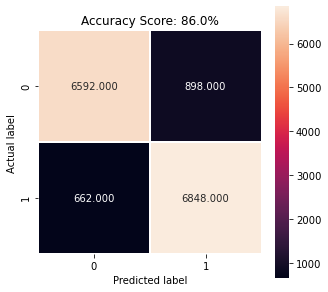

In [107]:
cm = metrics.confusion_matrix(test_sentiments, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion matrix:")
all_sample_title = 'Accuracy Score: {0}%'.format(np.round(score,2)*100)
plt.title(all_sample_title, size = 12)

In [108]:
from sklearn.metrics import classification_report
print("Classification report\n")
print(classification_report(test_sentiments, predictions))

Classification report

              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      7490
    positive       0.88      0.91      0.90      7510

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



In [109]:
from sklearn import metrics
print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(test_sentiments, predictions)))
print('Precision: {:2.2%} '.format(metrics.precision_score(test_sentiments, predictions, average='weighted')))
print('Recall:    {:2.2%} '.format(metrics.recall_score(test_sentiments, predictions, average='weighted')))
print('F1 Score:  {:2.2%} '.format(metrics.f1_score(test_sentiments, predictions, average='weighted')))                       

Accuracy:  89.60% 
Precision: 89.64% 
Recall:    89.60% 
F1 Score:  89.60% 
